In [2]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path

We are comparing std::shuffle vs fisher-yates vs fisher-yates_32 vs fisher_yates_64. We are running this on the unix machin at the universitiy.

In [3]:
# We load data
df_std_shuffle = pd.read_csv(path.join("..", "cpp", "uni-machine", "v0.1.9", "base_case", "20231213-020409-nb=0-bf=0-th=0-cpp.csv"))
df_fy_shuffle = pd.read_csv(path.join("..", "cpp", "uni-machine", "v0.1.9", "base_case", "20231213-021122-nb=0-bf=0-th=0-cpp.csv"))
df_fy_shuffle_32 = pd.read_csv(path.join("..", "cpp", "uni-machine", "v0.1.9", "base_case", "20231213-021932-nb=0-bf=0-th=0-cpp.csv"))
df_fy_shuffle_64 = pd.read_csv(path.join("..", "cpp", "uni-machine", "v0.1.9", "base_case", "20231213-022624-nb=0-bf=0-th=0-cpp.csv"))
df_buffered_fy_shuffle = pd.read_csv(path.join("..", "cpp", "uni-machine", "v0.1.9", "base_case", "20231213-030400-nb=0-bf=256-th=0-cpp.csv"))
df_buffered_fy_shuffle_64 = pd.read_csv(path.join("..", "cpp", "uni-machine", "v0.1.9", "base_case", "20231213-172004-nb=0-bf=256-th=0-cpp.csv"))
df_buffered_fy_shuffle_test = pd.read_csv(path.join("..", "cpp", "uni-machine", "v0.1.9", "base_case", "20231213-174922-nb=0-bf=256-th=0-cpp.csv"))

In [4]:
# We calculate runtime per integer
df_std_shuffle["runtime/integer [ns]"] = (df_std_shuffle["total_runtime"] / df_std_shuffle["total_runs"]) / df_std_shuffle["integers"]
df_fy_shuffle["runtime/integer [ns]"] = (df_fy_shuffle["total_runtime"] / df_fy_shuffle["total_runs"]) / df_fy_shuffle["integers"]
df_fy_shuffle_32["runtime/integer [ns]"] = (df_fy_shuffle_32["total_runtime"] / df_fy_shuffle_32["total_runs"]) / df_fy_shuffle_32["integers"]
df_fy_shuffle_64["runtime/integer [ns]"] = (df_fy_shuffle_64["total_runtime"] / df_fy_shuffle_64["total_runs"]) / df_fy_shuffle_64["integers"]
df_buffered_fy_shuffle["runtime/integer [ns]"] = (df_buffered_fy_shuffle["total_runtime"] / df_buffered_fy_shuffle["total_runs"]) / df_buffered_fy_shuffle["integers"]
df_buffered_fy_shuffle_64["runtime/integer [ns]"] = (df_buffered_fy_shuffle_64["total_runtime"] / df_buffered_fy_shuffle_64["total_runs"]) / df_buffered_fy_shuffle_64["integers"]
df_buffered_fy_shuffle_test["runtime/integer [ns]"] = (df_buffered_fy_shuffle_test["total_runtime"] / df_buffered_fy_shuffle_test["total_runs"]) / df_buffered_fy_shuffle_test["integers"]

Text(0.5, 1.0, 'Comapring some shhuffle algorithms for base case')

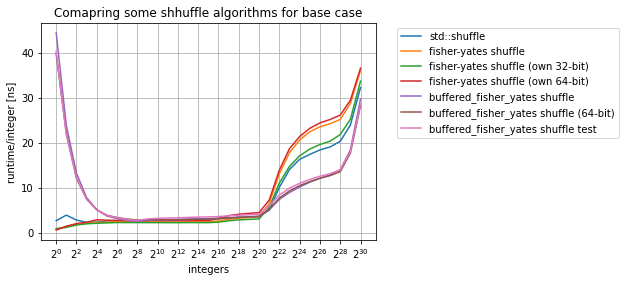

In [7]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 31, 2)]
ax_yticks = [1 * i for i in range(0, 50, 1)]

ax = df_std_shuffle.plot(x="integers", y="runtime/integer [ns]", label="std::shuffle")
df_fy_shuffle.plot(ax=ax, x="integers", y="runtime/integer [ns]", label="fisher-yates shuffle")
df_fy_shuffle_32.plot(ax=ax, x="integers", y="runtime/integer [ns]", label="fisher-yates shuffle (own 32-bit)")
df_fy_shuffle_64.plot(ax=ax, x="integers", y="runtime/integer [ns]", label="fisher-yates shuffle (own 64-bit)")
df_buffered_fy_shuffle.plot(ax=ax, x="integers", y="runtime/integer [ns]", label="buffered_fisher_yates shuffle")
df_buffered_fy_shuffle_64.plot(ax=ax, x="integers", y="runtime/integer [ns]", label="buffered_fisher_yates shuffle (64-bit)")
df_buffered_fy_shuffle_test.plot(ax=ax, x="integers", y="runtime/integer [ns]", label="buffered_fisher_yates shuffle test")

ax.set_xscale("log", base=2)
#ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
# ax.set_yticks(ax_yticks)
# ax.set_ylim(0, 10)
ax.grid(True)
ax.set_xlabel("integers")
ax.set_ylabel("runtime/integer [ns]")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_title("Comapring some shhuffle algorithms for base case")

Let's check throughput which the inverse of runtime per integer! 

In [32]:
# We calculate throughput
factor = 1
df_std_shuffle["throughout (items/time)"] = (df_std_shuffle["total_runs"] * df_std_shuffle["integers"] * factor) / df_std_shuffle["total_runtime"]
df_fy_shuffle["throughout (items/time)"] = (df_fy_shuffle["total_runs"] * df_fy_shuffle["integers"] * factor) / df_fy_shuffle["total_runtime"]
df_fy_shuffle_32["throughout (items/time)"] = (df_fy_shuffle_32["total_runs"] * df_fy_shuffle_32["integers"] * factor) / df_fy_shuffle_32["total_runtime"]
df_fy_shuffle_64["throughout (items/time)"] = (df_fy_shuffle_64["total_runs"] * df_fy_shuffle_64["integers"] * factor) / df_fy_shuffle_64["total_runtime"]
df_buffered_fy_shuffle["throughout (items/time)"] = (df_buffered_fy_shuffle["total_runs"] * df_buffered_fy_shuffle["integers"] * factor) / df_buffered_fy_shuffle["total_runtime"]
df_buffered_fy_shuffle_64["throughout (items/time)"] = (df_buffered_fy_shuffle_64["total_runs"] * df_buffered_fy_shuffle_64["integers"] * factor) / df_buffered_fy_shuffle_64["total_runtime"]
df_buffered_fy_shuffle_test["throughout (items/time)"] = (df_buffered_fy_shuffle_test["total_runs"] * df_buffered_fy_shuffle_test["integers"] * factor) / df_buffered_fy_shuffle_test["total_runtime"]

Text(0.5, 1.0, 'Comapring some shhuffle algorithms for base case')

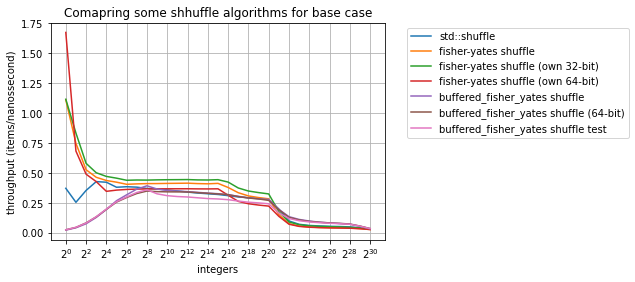

In [33]:
# We plot data
ax_th_xticks = [2 ** i for i in range(0, 31, 2)]
# ax_th_yticks = [5 * i for i in range(0, 10, 1)]

ax_th = df_std_shuffle.plot(x="integers", y="throughout (items/time)", label="std::shuffle")
df_fy_shuffle.plot(ax=ax_th, x="integers", y="throughout (items/time)", label="fisher-yates shuffle")
df_fy_shuffle_32.plot(ax=ax_th, x="integers", y="throughout (items/time)", label="fisher-yates shuffle (own 32-bit)")
df_fy_shuffle_64.plot(ax=ax_th, x="integers", y="throughout (items/time)", label="fisher-yates shuffle (own 64-bit)")
df_buffered_fy_shuffle.plot(ax=ax_th, x="integers", y="throughout (items/time)", label="buffered_fisher_yates shuffle")
df_buffered_fy_shuffle_64.plot(ax=ax_th, x="integers", y="throughout (items/time)", label="buffered_fisher_yates shuffle (64-bit)")
df_buffered_fy_shuffle_test.plot(ax=ax_th, x="integers", y="throughout (items/time)", label="buffered_fisher_yates shuffle test")

ax_th.set_xscale("log", base=2)
# ax.set_yscale("log", base=10)
ax_th.set_xticks(ax_th_xticks)
# ax_th.set_yticks(ax__yticks)
ax_th.grid(True)
ax_th.set_xlabel("integers")
ax_th.set_ylabel("throughput (items/nanossecond)")
ax_th.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax_th.set_title("Comapring some shhuffle algorithms for base case")